In [112]:
!gdown 1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc

Downloading...
From: https://drive.google.com/uc?id=1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc
To: C:\Users\HP\Downloads\alzheimer.csv

  0%|          | 0.00/2.38M [00:00<?, ?B/s]
 22%|##2       | 524k/2.38M [00:00<00:00, 2.86MB/s]
 66%|######6   | 1.57M/2.38M [00:00<00:00, 5.41MB/s]
100%|##########| 2.38M/2.38M [00:00<00:00, 5.62MB/s]
100%|##########| 2.38M/2.38M [00:00<00:00, 5.25MB/s]


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [114]:
data = pd.read_csv('alzheimer.csv')
data.head(5)

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,P000001,Orthopedics,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,P000002,Orthopedics,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,P000003,Pediatrics,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,P000004,Pediatrics,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,P000005,Neurology,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable


In [115]:
data.drop('PatientID',axis=1,inplace=True)

In [116]:
#target column is RiskLevel

In [117]:
def viz(data,columns,numerical):
    plt.figure(figsize=(14,4))
    for i in range(len(columns)):
        plt.subplot(1,len(columns),i+1)
        if numerical:
            plt.hist(data[columns[i]],bins=15)
        else:
            counts = data.groupby(columns[i]).size()
            plt.bar(counts.index.astype(str),counts)
        plt.title(columns[i])

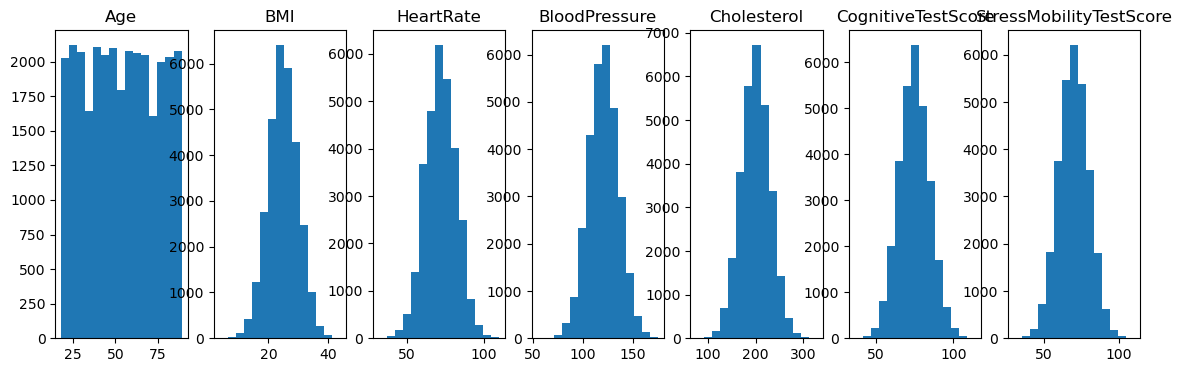

In [118]:
viz(data,['Age','BMI','HeartRate','BloodPressure','Cholesterol','CognitiveTestScore','StressMobilityTestScore'],True)

In [119]:
#StressMobilityTestScore  ima normalna raspredelba

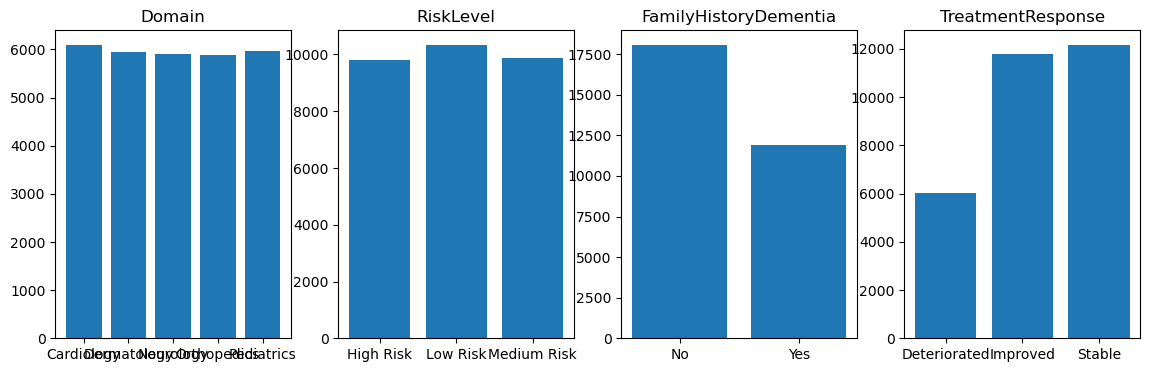

In [120]:
viz(data,['Domain','RiskLevel','FamilyHistoryDementia','TreatmentResponse'],False)

In [121]:
#mozeme da zabelezime deka ima priblizno ednakov broj na podatoci od site kategorii vo kolonata Domain , isto taka i vo kolonata RiskLevel

In [122]:
data.isnull().mean() * 100

Domain                     0.666667
Age                        0.666667
BMI                        0.666667
HeartRate                  0.166667
BloodPressure              0.666667
Cholesterol                0.666667
CognitiveTestScore         0.166667
StressMobilityTestScore    0.666667
RiskLevel                  0.000000
FamilyHistoryDementia      0.000000
TreatmentResponse          0.000000
dtype: float64

In [123]:
data.isnull().sum()

Domain                     200
Age                        200
BMI                        200
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

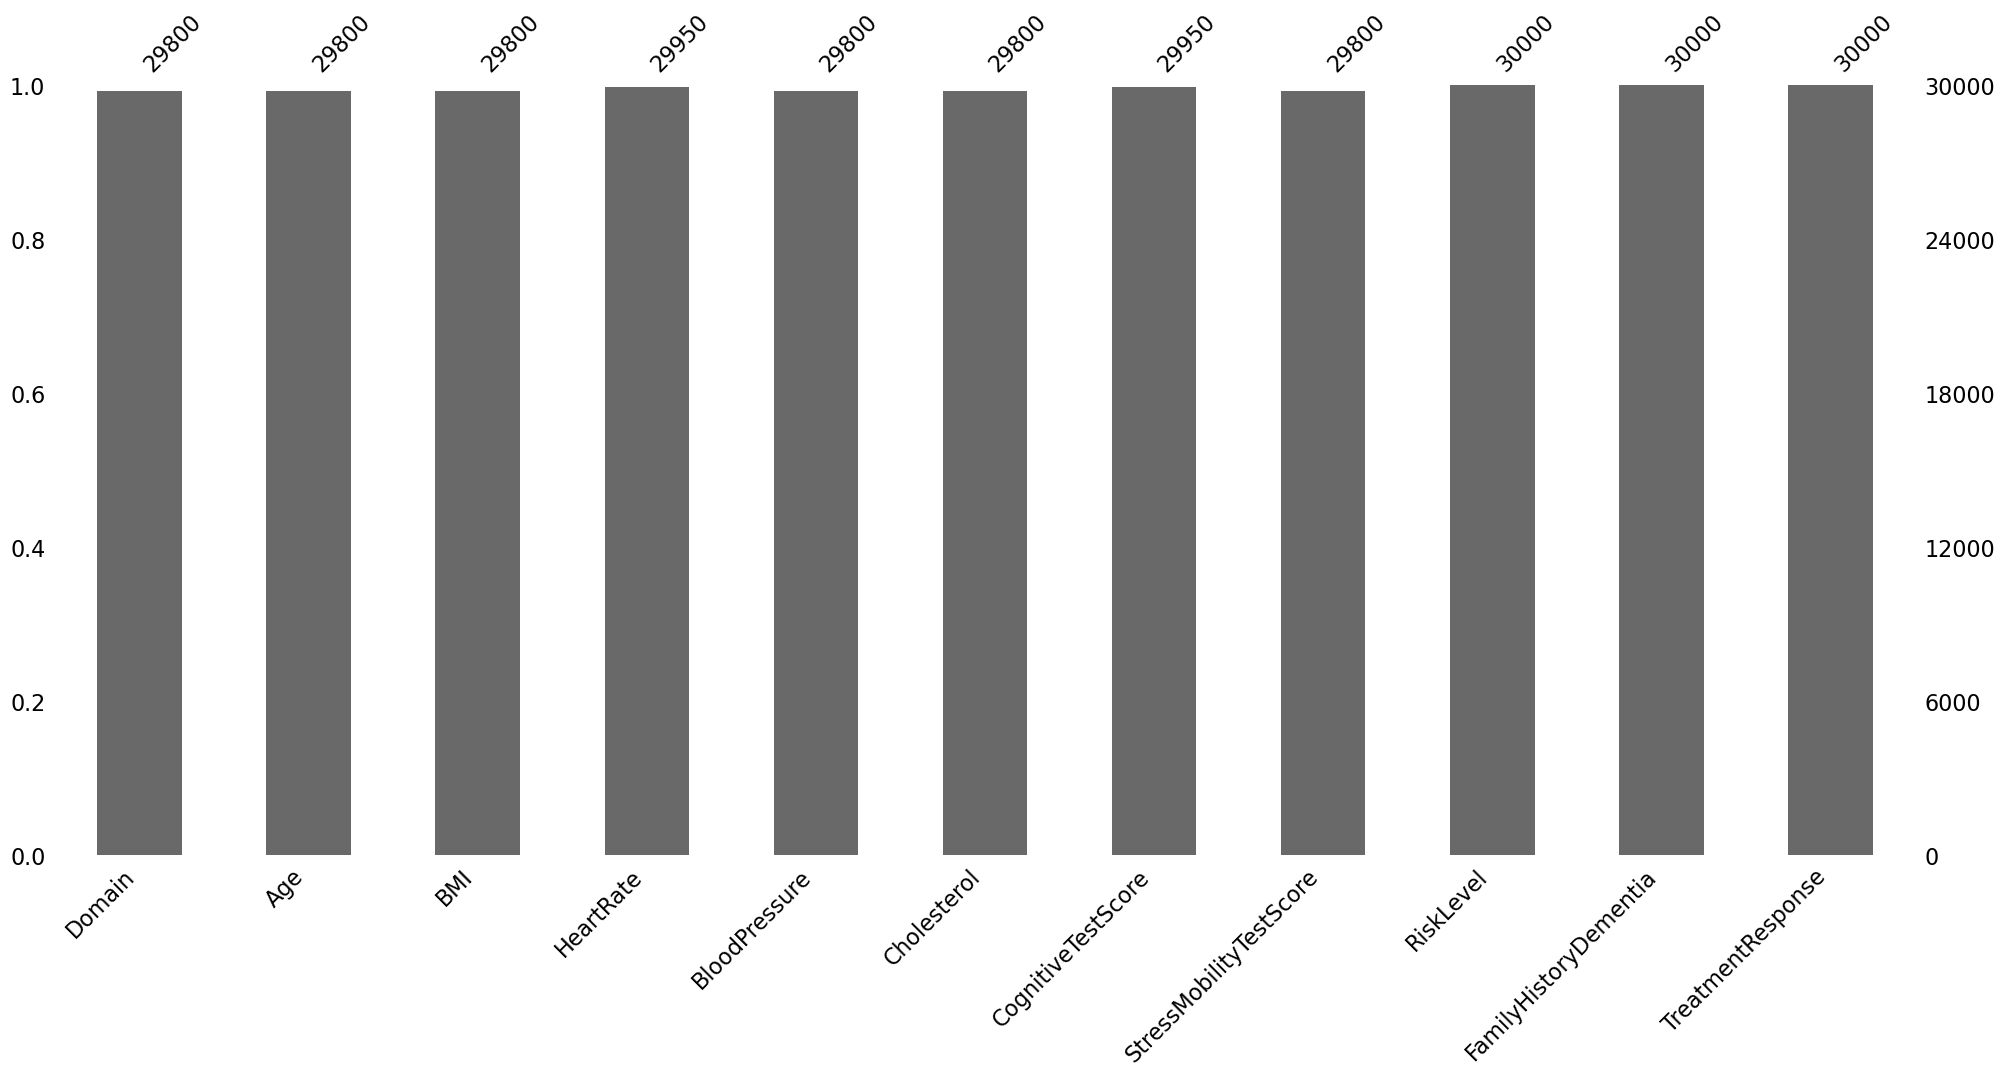

In [124]:
msno.bar(data)
plt.show()

In [125]:
#encoding the categorical features(Domain,RiskLevel,FamilyHistoryDementia,TreatmentResponse)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Domain                   29800 non-null  object 
 1   Age                      29800 non-null  float64
 2   BMI                      29800 non-null  float64
 3   HeartRate                29950 non-null  float64
 4   BloodPressure            29800 non-null  float64
 5   Cholesterol              29800 non-null  float64
 6   CognitiveTestScore       29950 non-null  float64
 7   StressMobilityTestScore  29800 non-null  float64
 8   RiskLevel                30000 non-null  object 
 9   FamilyHistoryDementia    30000 non-null  object 
 10  TreatmentResponse        30000 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.5+ MB


In [127]:
data['RiskLevel'].unique()

array(['High Risk', 'Low Risk', 'Medium Risk'], dtype=object)

In [128]:
data['TreatmentResponse'].unique()

array(['Stable', 'Improved', 'Deteriorated'], dtype=object)

In [129]:
data['FamilyHistoryDementia'].unique()

array(['No', 'Yes'], dtype=object)

In [130]:
def riskLevel_encode(x):
    if type(x) == float:
        return x
    if 'Low Risk' in x:
        return 0
    if 'Medium Risk' in x:
        return 1
    if 'High Risk' in x:
        return 2

In [131]:
def treatment_encode(x):
    if type(x) == float:
        return x
    if 'Deteriorated' in x:
        return 0
    if 'Improved' in x:
        return 1
    if 'Stable' in x:
        return 2

In [132]:
def dementia_encode(x):
    if type(x) == float:
        return x
    if 'No' in x:
        return 0
    if 'Yes' in x:
        return 1

In [133]:
data['Domain'].unique()

array(['Orthopedics', 'Pediatrics', 'Neurology', 'Dermatology',
       'Cardiology', nan], dtype=object)

In [134]:
def label_data(data,columns):
    data_copy = data.copy()
    le = LabelEncoder()
    for column in columns:
        no_nans = data_copy[column].dropna()
        le.fit(no_nans)
        data_copy[column] = data_copy[column].apply(lambda x: le.transform([x])[0] if pd.notna(x) else x)
    return data_copy

In [135]:
data = label_data(data,['Domain'])
data.head(5)

,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,3.0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,3.0,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,4.0,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,4.0,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,2.0,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable


In [136]:
data['RiskLevel']= data['RiskLevel'].apply(riskLevel_encode)

In [137]:
data['FamilyHistoryDementia'] = data['FamilyHistoryDementia'].apply(dementia_encode)

In [138]:
data['TreatmentResponse'] = data['TreatmentResponse'].apply(treatment_encode)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Domain                   29800 non-null  float64
 1   Age                      29800 non-null  float64
 2   BMI                      29800 non-null  float64
 3   HeartRate                29950 non-null  float64
 4   BloodPressure            29800 non-null  float64
 5   Cholesterol              29800 non-null  float64
 6   CognitiveTestScore       29950 non-null  float64
 7   StressMobilityTestScore  29800 non-null  float64
 8   RiskLevel                30000 non-null  int64  
 9   FamilyHistoryDementia    30000 non-null  int64  
 10  TreatmentResponse        30000 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 2.5 MB


<Axes: >

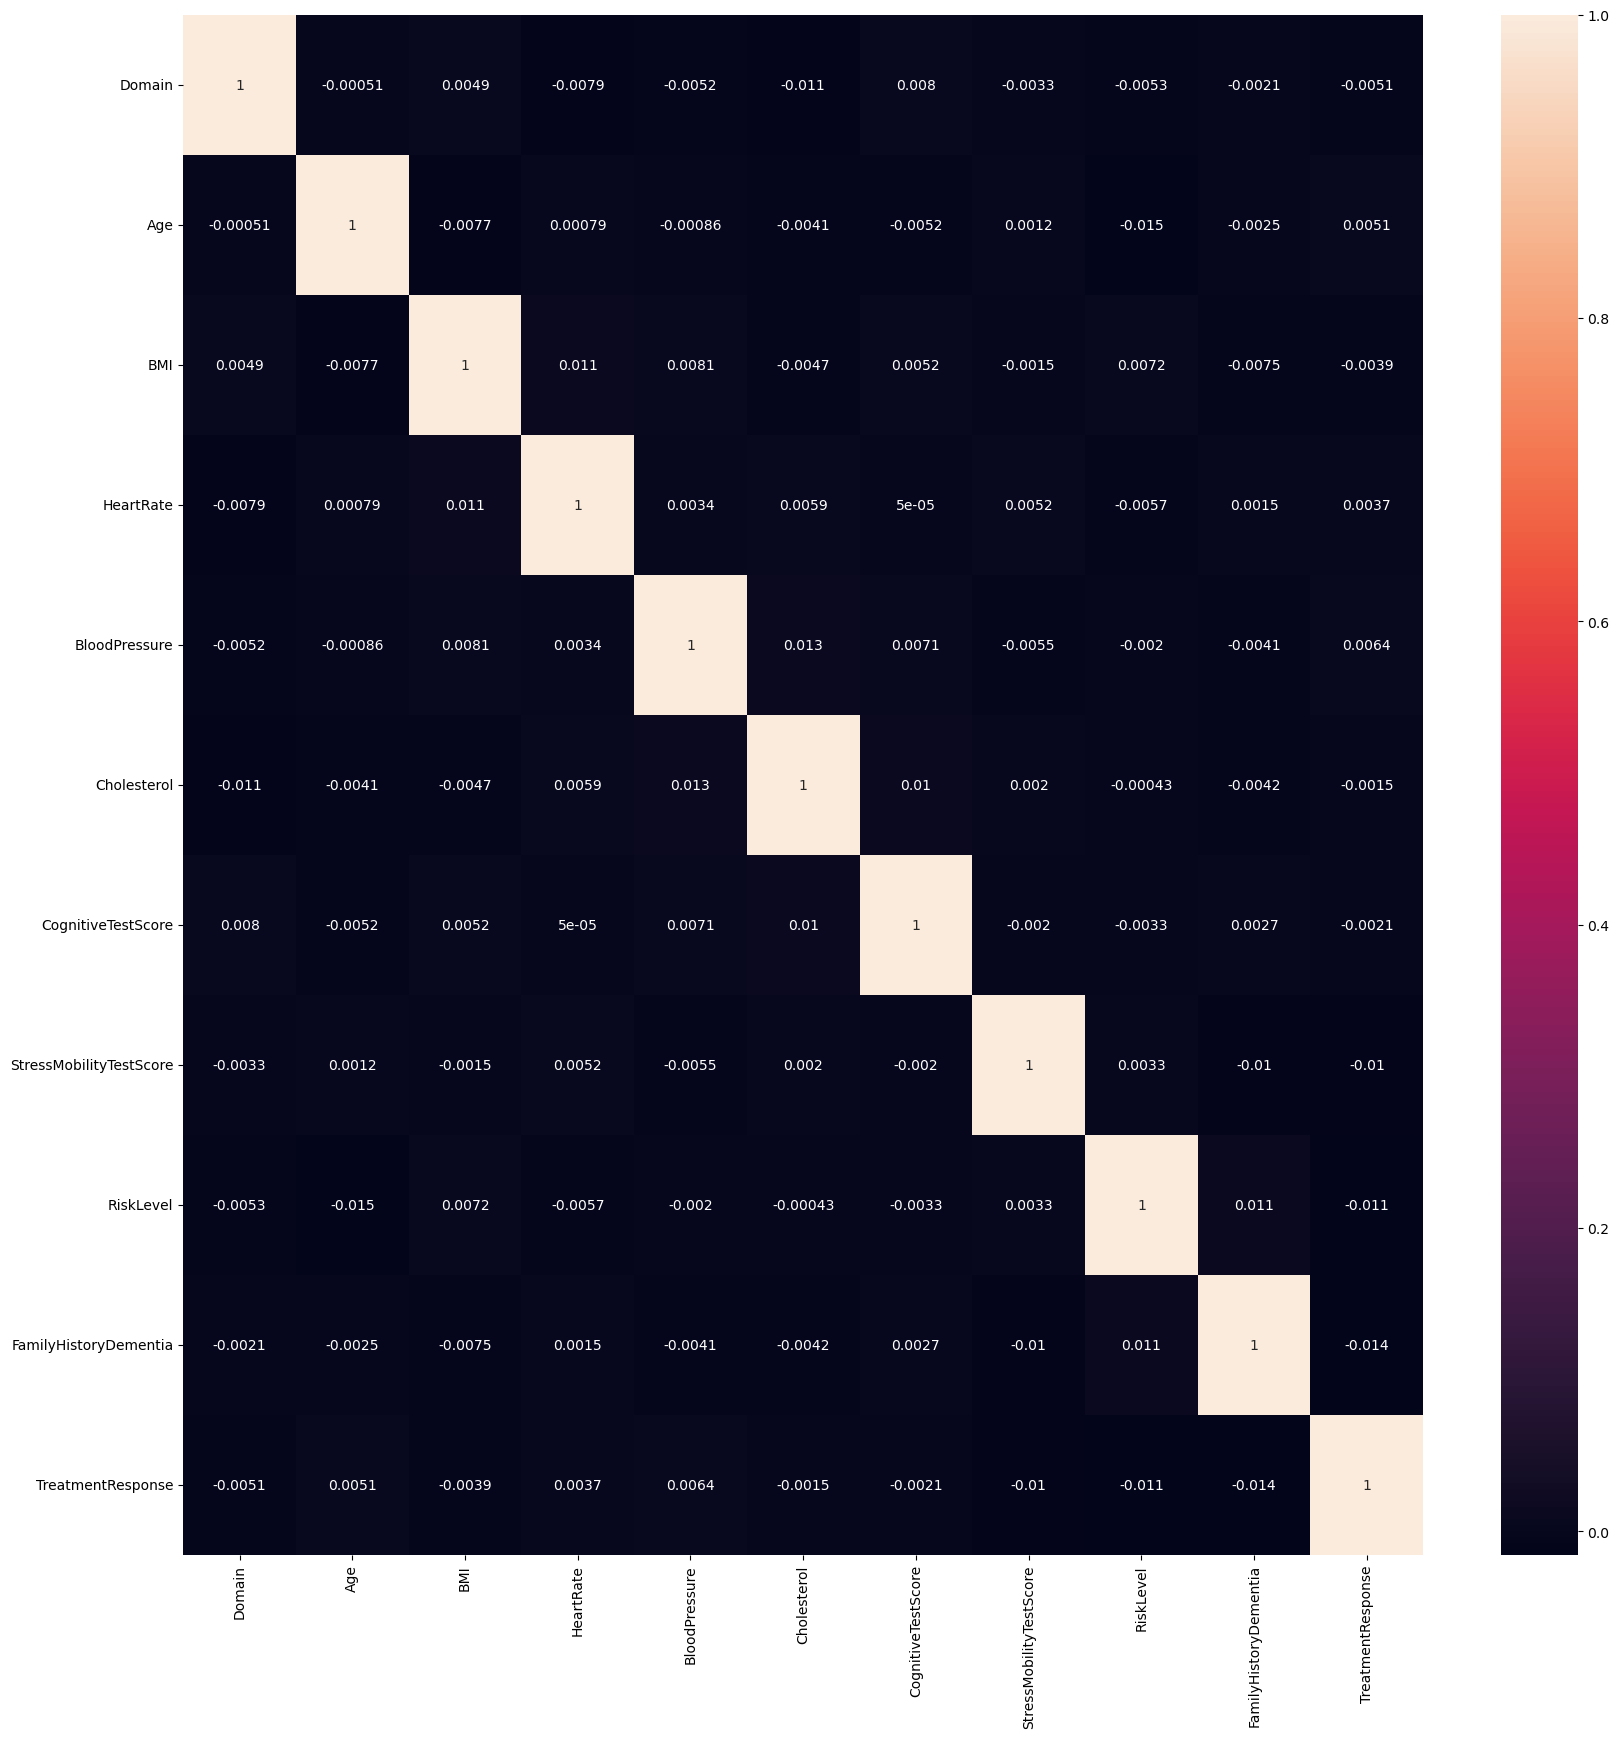

In [140]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [141]:
#mozeme da vidime deka nema korelacija pomegju features 

In [142]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [143]:
def fill_mean(data,columns):
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = data_copy[column].fillna(data_copy[column].mean())
    return data_copy

In [144]:
data = fill_mean(data,['BMI','HeartRate','BloodPressure','Cholesterol','CognitiveTestScore','StressMobilityTestScore'])

In [145]:
data.isnull().sum()

Domain                     200
Age                          0
BMI                          0
HeartRate                    0
BloodPressure                0
Cholesterol                  0
CognitiveTestScore           0
StressMobilityTestScore      0
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

In [146]:
data.drop('Domain',axis=1,inplace=True)

In [147]:
data.head(5)

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,2,0,2
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,0,0,1
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,0,1,0
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,1,1,1
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,2,0,2


In [148]:
from sklearn.model_selection import train_test_split
data_new = data.drop('RiskLevel',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['RiskLevel'],test_size=0.2)

In [149]:
#sporedba pomegju decisiontreeclassifier i xgbclassifier

In [150]:
from xgboost import XGBClassifier

model1 = XGBClassifier()
model1.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [191]:
preds1=model1.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score
print("Accuracy for the first model: ",accuracy_score(Y_test,preds1))

Accuracy for the first model:  0.3461666666666667


In [197]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [199]:
preds2 = model2.predict(X_test)

In [201]:
print("Accuracy for second model: ",accuracy_score(Y_test,preds2))

Accuracy for second model:  0.3348333333333333
